In [1]:
import pandas as pd 
import numpy as np
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("../data/processed/MachineLearningRating_v3.txt",sep="|")

/tmp/ipykernel_56608/2309441558.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("../data/processed/MachineLearningRating_v3.txt",sep="|")


In [3]:
data.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


### Data Description

In [4]:
# Overview of Data
def data_overview(data):
    print("Data Overview:")
    print(f"Number of rows: {data.shape[0]}")
    print(f"Number of columns: {data.shape[1]}")
    print("\nColumn Names:")
    print(data.columns.tolist())
    print("\nData Types:")
    print(data.dtypes)
    print("\nMissing Values:")
    print(data.isnull().sum())
    print("\nFirst 5 Rows:")
    print(data.head())
data_overview(data)

Data Overview:
Number of rows: 1000098
Number of columns: 52

Column Names:
['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']

Data Types:
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
I

In [5]:
# Check missing values with visualization
print(data.isnull().sum())
"""sns.heatmap(data.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()"""


UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

'sns.heatmap(data.isnull(), cbar=False)\nplt.title("Missing Values Heatmap")\nplt.show()'

### Univariant Analysis

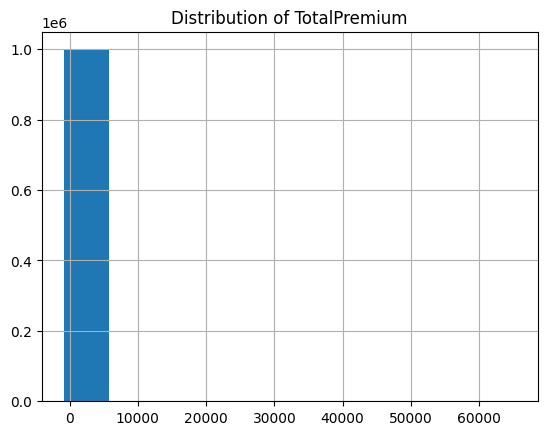

'# Correlation matrix\ncorrelation_matrix = data.corr()\nplt.figure(figsize=(12, 10))\nsns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=\'coolwarm\', square=True)\nplt.title("Correlation Matrix")\nplt.show()\n# Pairplot for visualizing relationships\nsns.pairplot(data, diag_kind=\'kde\', markers=\'o\', hue=\'Rating\')\nplt.suptitle("Pairplot of Features", y=1.02)\nplt.show()\n# Boxplot for TotalPremium by Rating\nplt.figure(figsize=(10, 6))\nsns.boxplot(x=\'Rating\', y=\'TotalPremium\', data=data)\nplt.title("Boxplot of TotalPremium by Rating")\nplt.xlabel("Rating")\nplt.ylabel("Total Premium")\nplt.show()'

In [ ]:
data['TotalPremium'].hist(bins=10)
plt.title("Distribution of TotalPremium")
plt.xlabel("Total Premium")
plt.ylabel("Frequency")
plt.show()
"""# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()
# Pairplot for visualizing relationships
sns.pairplot(data, diag_kind='kde', markers='o', hue='Rating')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()
# Boxplot for TotalPremium by Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', y='TotalPremium', data=data)
plt.title("Boxplot of TotalPremium by Rating")
plt.xlabel("Rating")
plt.ylabel("Total Premium")
plt.show()"""

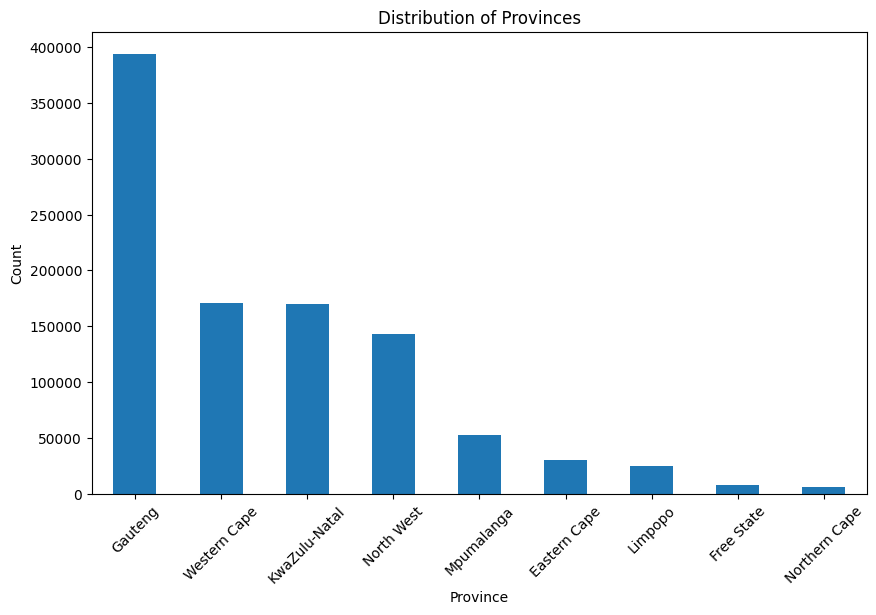

In [9]:
data['Province'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title("Distribution of Provinces")
plt.xlabel("Province")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### Bivarate /Multivariant analysis

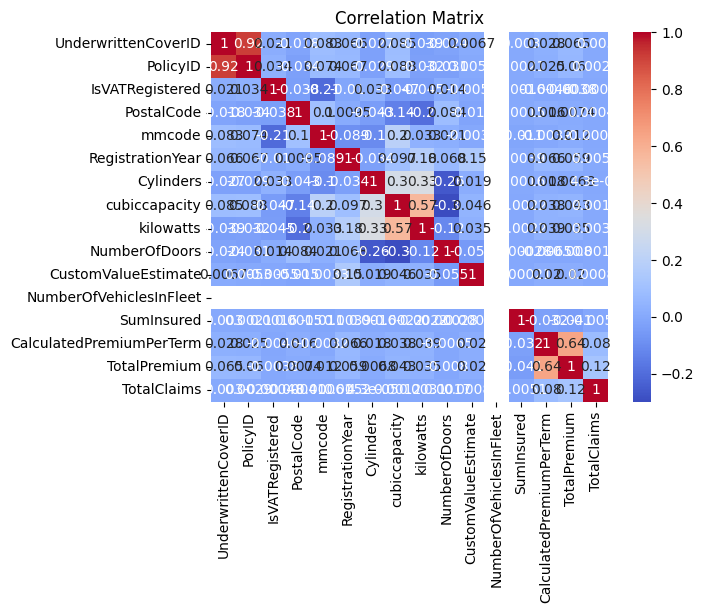

/home/alki/Project/insurance-risk-analytics-predictive-modeling/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


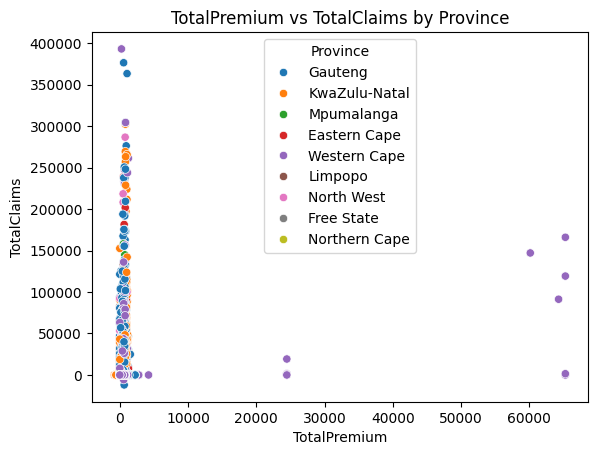

In [13]:
# Correlation matrix
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Scatter plot
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='Province', data=data)
plt.title("TotalPremium vs TotalClaims by Province")
plt.show()


### Outlier Detections

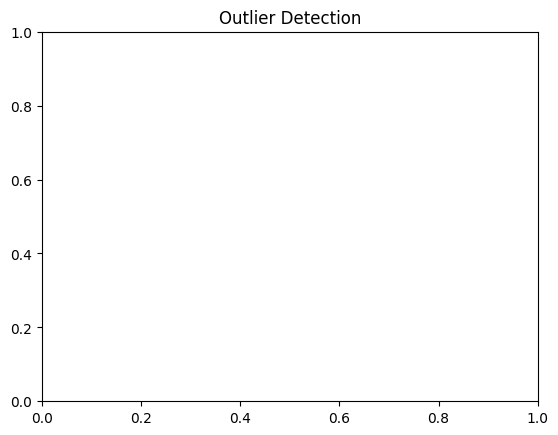

In [ ]:
sns.boxplot(data_df=data[['TotalPremium', 'TotalClaims']])
plt.title("Outlier Detection")
plt.show()